<body> <center>
		<h6>In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system. 
 
File and Data Field Descriptions 
 
    train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data. 
     
        PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always. 
         
        HomePlanet - The planet the passenger departed from, typically their planet of permanent residence. 
         
        CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. 
         
        Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. 
        Destination - The planet the passenger will be debarking to. 
        Age - The age of the passenger. 
         
        VIP - Whether the passenger has paid for special VIP service during the voyage. 
         
        RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has  
        billed at each of the Spaceship Titanic's many luxury amenities. 
         
        Name - The first and last names of the passenger. 
         
        Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict. 
         
         
    test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. 
     
    sample_submission.csv - A submission file in the correct format. 
     
        PassengerId - Id for each passenger in the test set. 
        Transported - The target. For each passenger, predict either True or False. 
</h6>
	</center></body>

In [1]:
# import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


In [2]:
# read data

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
nulleds = [train.isnull().sum(), test.isnull().sum()]
nulleds = pd.DataFrame(nulleds).T
nulleds.columns = ['train', 'test']
nulleds

,train,test
PassengerId,0.0,0.0
HomePlanet,201.0,87.0
CryoSleep,217.0,93.0
Cabin,199.0,100.0
Destination,182.0,92.0
Age,179.0,91.0
VIP,203.0,93.0
RoomService,181.0,82.0
FoodCourt,183.0,106.0
ShoppingMall,208.0,98.0


In [6]:
train.shape

(8693, 14)

In [7]:
test.shape

(4277, 13)

In [8]:
pd.DataFrame(train.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [9]:
pd.DataFrame(test.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name


In [10]:
#know the null values in the train and test data
test.isnull().sum() 

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

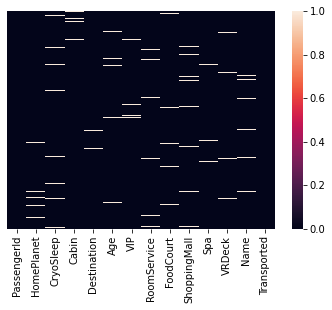

In [12]:
sns.heatmap(train.isnull(), yticklabels=False)

<AxesSubplot:>

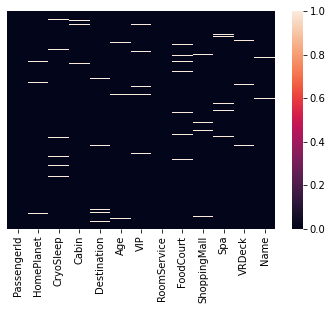

In [13]:
sns.heatmap(test.isnull(), yticklabels=False)

In [14]:
#replace the null values in the train and test data with the mean of the column values

train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True) 



<ipython-input-14-46668bdd0200>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)
<ipython-input-14-46668bdd0200>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace=True)


In [15]:
#print null values in the train and test data.value_counts()

In [16]:
print(pd.DataFrame(test.isnull().sum()))

                0
PassengerId     0
HomePlanet     87
CryoSleep       0
Cabin         100
Destination    92
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name           94


In [17]:
#finishing repair the null values in the train and test data

def repair_null(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].value_counts().index[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

repair_null(train)
repair_null(test)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [18]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [19]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [20]:
#i want try fast-ml library 
from fast_ml import eda

In [21]:
eda.df_info(train)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
PassengerId,object,Categorical,8693,"[0001_01, 0002_01, 0003_01, 0003_02, 0004_01, ...",0,0.0
HomePlanet,object,Categorical,3,"[Europa, Earth, Mars]",0,0.0
CryoSleep,object,Categorical,3,"[False, True, 0.35830580462482303]",0,0.0
Cabin,object,Categorical,6560,"[B/0/P, F/0/S, A/0/S, F/1/S, F/0/P, F/2/S, G/0...",0,0.0
Destination,object,Categorical,3,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e]",0,0.0
Age,float64,Numerical,81,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28....",0,0.0
VIP,object,Categorical,3,"[False, True, 0.023439340400471142]",0,0.0
RoomService,float64,Numerical,1274,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71...",0,0.0
FoodCourt,float64,Numerical,1508,"[0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0...",0,0.0
ShoppingMall,float64,Numerical,1116,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, 173.72916...",0,0.0


In [22]:
# create a dataframes copy of the train and test data to be used in the model

test_copy = test
train_copy = train